In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(50, 1)
y = 3 + 4 * X + np.random.randn(50, 1)
# Valores iniciales de los parámetros
w_0 = 0
w_1 = 0
# Tasa de aprendizaje
alpha = 0.01
# Número de iteraciones
num_iterations = 2000

In [3]:
def gradient_MSE(X, y, w_0, w_1):
    n = len(X)
    # Inicializa las derivadas parciales
    grad_w0 = 0
    grad_w1 = 0
    # Calcula las derivadas parciales
    for i in range(n):
        #el factor 2/n se utiliza para escalar el gradiente del MSE de manera 
        #que sea proporcional al tamaño del conjunto de datos y se pueda 
        #aplicar con eficacia durante el proceso de actualización de los 
        #parámetros en el descenso por gradiente.
        grad_w0 += 2/n * (w_0 + w_1*X[i] - y[i])
        grad_w1 += 2/n * X[i] * (w_0 + w_1*X[i] - y[i])
    return grad_w0, grad_w1

def update_GD(X, y, w_0, w_1, alpha):
    # Calcula el gradiente
    grad_w0, grad_w1 = gradient_MSE(X, y, w_0, w_1)
    # Actualiza los parámetros utilizando el learning rate alpha
    w_0 -= alpha * grad_w0
    w_1 -= alpha * grad_w1
    return w_0, w_1

In [4]:
def plot_regression_line(X, y, w_0, w_1):
    plt.scatter(X, y, color='blue', label='Datos de entrenamiento')
    # Calcula los valores predichos utilizando los parámetros finales
    y_pred = [w_0 + w_1*x_i for x_i in X]
    plt.plot(X, y_pred, color='red', label='Regresión lineal')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Regresión lineal con un solo feature')
    plt.legend()
    plt.show()

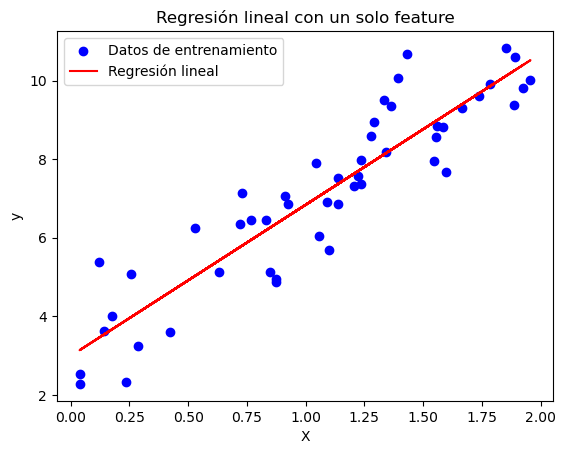

In [11]:
# Actualización de los parámetros utilizando el descenso por gradiente
for i in range(num_iterations):
    w_0, w_1 = update_GD(X, y, w_0, w_1, alpha)

# Graficar la regresión lineal resultante
plot_regression_line(X, y, w_0, w_1)